# Here is a real use of the cubic grid search. I use the grid to find starting parameters for the compound Sr2PrO4 which has tetragonal symmetry. The starting parameters will then be used in the file "Crystal Field Analysis".

In [1]:
%reload_ext autoreload
import sys
sys.path.append('../../')
from JensenTools import *
import numpy as np
import matplotlib.pyplot as plt
import PyCrystalField as cef
import os
import scipy.io as sio
from functools import reduce
# import time

saveDir = getSaveDir() + 'cubic_matrix_J/' 

 *******************************************************
 *                PyCrystalField 2.3.1                 *
 *  Please cite  J. Appl. Cryst. (2021). 54, 356-362   * 
 *    <https://doi.org/10.1107/S160057672001554X>      *
 *******************************************************



### Define the measured energy levels (from INS data) and define an allowable tolerance between calculated and measured energy.

In [2]:
tol = .025 #tolerance allowed between measured and calculated energy.
Emeas = [168, 335,385] # Our measured levels of Sr2PrO4
comp = 'Sr2PrO4' #Compound name

### In the following section we scan through all LS grids and find the (x,bpf) points that create matching energy levels.

Energies as measured by paper (meV):   [168, 335, 385]
dict_keys(['__header__', '__version__', '__globals__', 'X', 'B', 'E1', 'E2'])
['E1', 'E2']


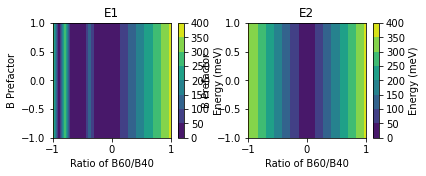


Parameter search for:   Compound:  Sr2PrO4  with 0.025 tolerance.
No compatibilities found


In [3]:
print('Energies as measured by paper (meV):  ', Emeas)

EList, data = loadMatrixJ(saveDir + 'J_grid.mat') #Load in all created 800x800 grids



#Loading the x,bpf, and LS of each file.
x = data['X'][0]
bpf = data['B'][0]
print(EList)

plotContoursJ(data,EList) #Contour plotting for 4 E levels


#Choose which bands to look for compatibilities.
#For since we only measure 3 magnetic modes, only search for compatibilities with energies [E1,E2,E3].
index = [1,2]
Eindex = []
EListindex = []
for i in index:
    Eindex.append(Emeas[i-1])
    EListindex.append(EList[i-1])

#Function call that searches for compatible (x,bpf) coordinates.
coords = paramFinderJ(data,EListindex,Eindex,tol,comp)

#Printing results
if len(coords) !=0:
    for j in [coords[0]]:
        print('!!! Compatibilities Found !!!')
        print('With x = ', x[j[0]], ' and bpf = ', bpf[j[1]])
        count = 1
        for i in EList[c]:
            print('E%i = '%count, data[i][j[0]][j[1]], 'meV')
            count += 1
        print()
else:
    print('No compatibilities found')


#If there is a compatibility then print an example of the matrix generated by PCF with cubic constraints.
if(len(coords) != 0):
    xind,bind = coords[0][0], coords[0][1]

    print('\nFor ', comp, ' at x[%i] = %.4f and bpf[%i] = %.4f'%(xind,x[xind],bind,bpf[bind]))
    print('Using these values lets construct the CF Hamiltonian\n')
    printPCFEigensJ(x[xind],bpf[bind])


### We find results for LS = 60 and LS = 100. Since Sr2PrO4 has the central ion Pr4+ which has a reported LS value of ~107meV, I decide to use the results from the LS = 100 run as my starting point for Crystal Field fitting.

LS = 100, x = 0.03629536921151444, and bpf = -0.6570713391739674